# 决策树

### 原理

得到原始数据集，然后基于最好的属性值划分数据集，由于特征值可能多于两个，因此可能可能存在大于两个分支的数据集划分。第一次划分完成之后，数据集将被向下传递到树分支的下一个节点，在这个节点上，我们可以再次划分数据。因此我们可以采用递归的原则处理数据集。
递归结束的条件是：程序遍历完所有划分数据集的属性，或者每个分支下的所有实例都具有相同的分类。如果所有的实例具有相同的分类，则得到一个叶子节点或者终止块。任何到达叶子节点的数据必然属于叶子节点的分类。

### 特征的选择，决策树的生成，决策树的剪枝

待补充

### 代码实现

In [68]:
#计算给定数据集的香浓熵(熵越高，混合的数据越多，在数据集中就可以添加更多的分类)
from math import log
def calcShannonEnt(dataSet):
    numEntries=len(dataSet)  #数据集中实例的总数
    labelCounts={}    #初始化空字典，为所有分类创建字典
    for featVec in dataSet:
        currentLabel=featVec[-1]  #每一行的样本的最后一个是标签（字典中的key）
        if currentLabel not in labelCounts.keys():  #如果字典中不存在此标签，就把标签最为key加入，同时初始其value为0
            labelCounts[currentLabel]=0 
        labelCounts[currentLabel]+=1        #字典中已存在此标签，就把该标签对应的value值加加
    shannonEnt=0.0            #初始化香浓熵为0
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries   #标签为key的样本的数目（也就是key所对应的的value）/样本总数
        shannonEnt-=prob*log(prob,2)  #按照香浓熵公式求算
    return shannonEnt

In [93]:
def createDataSet():
    dataSet=[[1,1,'yes'],
            [1,1,'yes'],
            [0,1,'no'],
            [1,0,'no'],
            [0,1,'no']]
    labels=['no surfacing','flippers']
    return dataSet,labels

In [94]:
myDat,labels=createDataSet()
print(myDat)
print(labels)
print(calcShannonEnt(myDat))
myDat2=myDat
myDat2[0][-1]='maybe'
print(myDat2)
print(myDat)  #myDat和myDat2都变了
print(calcShannonEnt(myDat2))
myDat[0][-1]='yes'
#得到熵之后可以按照获取的最大信息增益的方法划分数据集（另外还可以采用基尼不纯度进行度量集合无序程度的方法）

[[1, 1, 'yes'], [1, 1, 'yes'], [0, 1, 'no'], [1, 0, 'no'], [0, 1, 'no']]
['no surfacing', 'flippers']
0.9709505944546686
[[1, 1, 'maybe'], [1, 1, 'yes'], [0, 1, 'no'], [1, 0, 'no'], [0, 1, 'no']]
[[1, 1, 'maybe'], [1, 1, 'yes'], [0, 1, 'no'], [1, 0, 'no'], [0, 1, 'no']]
1.3709505944546687


In [71]:
#按照给定特征划分数据集
#最后返回的是从axis特征对应的值为value的样本去除axis列的数据
def splitDataSet(dataSet,axis,value):  #待划分的数据集，划分数据集的特征，需要返回的特征的值
    retDataSet=[]    #创建一个新的list对象
    for featVec in dataSet:  #遍历数据集
        if featVec[axis]==value:     #遍历的样本的axis特征若为指定的值
            reducedFeatVec=featVec[:axis]   #axis之前的内容，当遍历第一个样本时，若axis=0,此处为[];
            reducedFeatVec.extend(featVec[axis+1:]) #axis特征之后的值，当遍历第一个样本时，若axis=0,此处为[1,'maybe']
            retDataSet.append(reducedFeatVec) #类似[1,'maybe']的集合
    return retDataSet

In [72]:
print(splitDataSet(myDat,0,1))
print(splitDataSet(myDat,1,1))

[[1, 'yes'], [1, 'yes'], [0, 'no']]
[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]


In [73]:
#选择最好的数据集划分方式
def chooseBestFeatureToSplit(dataSet):
    numFeatures=len(dataSet[0])-1  #特征数目
    baseEntropy=calcShannonEnt(dataSet) #计算整个数据集的熵
    bestInfoGain=0.0 #初始化最好的增益为0
    bestFeature=-1 
    for i in range(numFeatures): #遍历所有的特征
        featList=[example[i] for example in dataSet]  #此特征下所有样本的取值（也即特征属性）
        uniqueVals=set(featList)  #特征属性去重重复属性，特征的属性取值
        newEntropy=0.0  
        for value in uniqueVals:  
            subDataSet=splitDataSet(dataSet,i,value) #对特征i以取值value为划分点对样本进行划分，划分出的是i特征取值为value的样本
            prob=len(subDataSet)/float(len(dataSet))
            newEntropy+=prob*calcShannonEnt(subDataSet)
        infoGain=baseEntropy-newEntropy
        if (infoGain>bestInfoGain):
            bestInfoGain=infoGain
            bestFeature=i
    return bestFeature
            


In [74]:
chooseBestFeatureToSplit(myDat)

0

In [95]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [0, 1, 'no'], [1, 0, 'no'], [0, 1, 'no']]

其他的决策树算法，如c4.5和CART,这些算法在运行的时候并不总是在每次划分分组时都会消耗特征，这在实际应用中就会引起一定的问题。在机器学习实战中并不考虑此问题，只需要在算法开始运行前计算列的数目，查看算法是否使用了所有属性即可。如果数据及已经处理了所有的属性，但是类标签依然不是唯一的，此时需要决定如何定义该叶子节点，通常采用的是多数表决的方法。

In [96]:
#遍历完所有的特征，返回出现次数最多的类别
import operator
def majorityCnt(classList):
    classCount={}  #类：次数-空字典
    for vote in classList: #遍历类别，并统计每个类别出现的次数
        if vote not in classCount.keys():
            classCount[vote]=0
        classCount[vote]+=1
    sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True) #字典分解为元组列表，按照第二个元素的次序对元组进行排序（逆序）
    return sortedClassCount[0][0] #返回出现次数最多的类别数

In [97]:
#创建树的函数代码
def createTree(dataSet,labels):
    classList=[example[-1] for example in dataSet] #取出数据集中的类别列
    if classList.count(classList[0])==len(classList): #类别列表中的第一个列表的长度等于类别列表总长的时候，说明类别已经全是一类，不用再分
        return classList[0]
    if len(dataSet[0])==1: #遍历完所有的特征时
        return majorityCnt(classList)  #返回出现次数最多的类别
    bestFeat=chooseBestFeatureToSplit(dataSet) #信息增益最大的特征的序号
    bestFeatLabel=labels[bestFeat]
    myTree={bestFeatLabel:{}}  #决策树的根节点
    del(labels[bestFeat])  #删除此特征
    featValues=[example[bestFeat] for example in dataSet] #划分特征的所有属性值
    uniqueVals=set(featValues)  #属性去重
    for value in uniqueVals:
        subLabels=labels[:]
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
    return myTree
    
    

In [98]:
myTree=createTree(myDat,labels)


In [102]:
list(myTree.keys())[0]

'no surfacing'

### 使用Matplotlib注解绘制树形图

In [45]:
#使用文本注解绘制树节点
import matplotlib.pyplot as plt
%matplotlib inline
#以下两行是为了正常显示汉字
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

decisionNode=dict(boxstyle="sawtooth",fc="0.8")  #定义文本框
leafNode=dict(boxstyle="round4",fc="0.8")
arrow_args=dict(arrowstyle="<-")  #箭头格式

#创建绘图区
def createPlot():
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    createPlot.ax1=plt.subplot(111,frameon=False)
    plotNode('决策节点',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode('叶节点',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

#实际的绘图功能
def plotNode(nodeTxt,centerPt,parentPt,nodeType): #绘制带箭头的注解
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction',xytext=centerPt,\
                            textcoords='axes fraction',va="center",ha="center",bbox=nodeType,arrowprops=arrow_args)
    
    


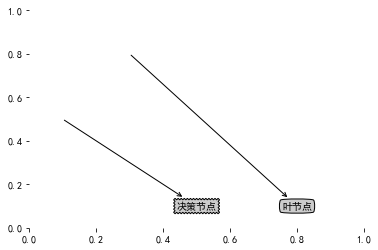

In [46]:
createPlot()

### 构造注解树 

In [113]:
print(myTree)
root=list(myTree.keys())
print(root)
secDict=myTree[root[0]].keys()
print(secDict)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
['no surfacing']
dict_keys([0, 1])


In [125]:
# 获取叶节点的数目和树的层数
def getNumLeafs(myTree):
    numLeafs=0
    firstStr=list(myTree.keys())[0]  #python3改变了dict.keys,返回的是dict_keys对象，支持iterable,不支持indexable
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':  #type测试节点的数据类型是否为字典
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth=0
    firstStr=list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth=1+getTreeDepth(secondDict[key])
        else:
            thisDepth=1
        if thisDepth > maxDepth:
            maxDepth=thisDepth
    return maxDepth

In [120]:
#定义retrieveTree输出预先存储的树信息，避免了每次测试代码时都要从数据中创建树的麻烦
def retrieveTree(i):
    listOfTrees=[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                 {'no surfacing': {0: 'no', 1: {'flippers': {0:{'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                ]
    return listOfTrees[i]

In [126]:
print(retrieveTree(1))
print(retrieveTree(0))
print(getNumLeafs(myTree))
print(getTreeDepth(myTree))

{'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
3
2


In [144]:
#plotTree函数
def plotMidText(cntrPt,parentPt,txtString): #在父子节点间填充信息
    xMid=(parentPt[0]-cntrPt[0])/2.0+cntrPt[0]
    yMid=(parentPt[1]-cntrPt[1])/2.0+cntrPt[1]
    createPlot.ax1.text(xMid,yMid,txtString)

def plotTree(myTree,parentPt,nodeTxt):
    numLeafs=getNumLeafs(myTree)
    depth=getTreeDepth(myTree)
    firstStr=list(myTree.keys())[0]
    cntrPt=(plotTree.xOff+(1.0+float(numLeafs))/2.0/plotTree.totalW,plotTree.yOff)
    plotMidText(cntrPt,parentPt,nodeTxt)  #标记子节点属性值
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    secondDict=myTree[firstStr]
    plotTree.yOff=plotTree.yOff-1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff=plotTree.xOff+1.0/plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff=plotTree.yOff+1.0/plotTree.totalD
   
    
def createPlot(inTree):
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    axprops=dict(xticks=[],yticks=[])
    createPlot.ax1=plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW=float(getNumLeafs(inTree))
    plotTree.totalD=float(getTreeDepth(inTree))
    plotTree.xOff=-0.5/plotTree.totalW
    plotTree.yOff=1.0
    plotTree(inTree,(0.5,1.0),'')
    plt.show()

    

{'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}


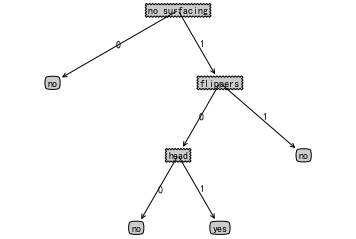

In [145]:
myTree2=retrieveTree(1)
print(myTree2)
createPlot(myTree2)

### 测试算法

In [146]:
#使用决策树的分类函数
def classify(inputTree,featLabels,testVec):
    firstStr=list(inputTree.keys())[0]
    secondDict=inputTree[firstStr]
    featIndex=featLabels.index(firstStr) #将类别字符串转换为索引
    for key in secondDict.keys():
        if testVec[featIndex]==key:
            if type(secondDict[key]).__name__=='dict':  #
                classLabel=classify(secondDict[key],featLabels,testVec)
            else:
                classLabel=secondDict[key]
    return classLabel
    

In [148]:
print(myTree)
root=list(myTree.keys())
print(root)
secDict=myTree[root[0]].keys()
print(secDict)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
['no surfacing']
dict_keys([0, 1])


In [151]:
myDat,labels=createDataSet()
myTree=retrieveTree(0)
print(classify(myTree,labels,[1,0]))
print(classify(myTree,labels,[1,1]))

no
yes


#### 使用算法的时候，先把决策树存储起来，用创建好的决策树解决分类问题，会更节省时间，因为构造决策树是很费时的任务。
### 这也是决策树与k-近邻算法的不同，k-近邻无法持久化分类器（预先提炼并存储数据集中包含的知识信息，在需要对事物进行分类时再使用这些知识）

In [158]:
#使用pickle模块存储决策树
def storeTree(inputTree,filename):
    import pickle  #使用python模块pickle序列化对象，序列化对象可以在磁盘上保存对象，并在需要的时候读取出来
    fw=open(filename,'wb')
    pickle.dump(inputTree,fw)
    fw.close()
    
def grabTree(filename):
    import pickle
    fr=open(filename,'rb')
    return pickle.load(fr)

In [159]:
storeTree(myTree,'classifierStorage.txt')
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

### 示例：使用决策树预测隐形眼镜类型

（1）收集数据：提供的文本文件  
（2）准备数据：解析tab键分隔的数据行
（3）分析数据：快速检查数据，确保正确地解析数据内容，使用createPlot()函数绘制最终的树形图   
（4）训练算法：使用createTree()函数  
（5）测试算法：编写测试函数验证决策树可以正确分类给定的数据实例  
（6）使用算法：存储树的数据结构，以便下次使用时无需重新构造树  

[['young', 'myope', 'no', 'reduced', 'no lenses'], ['young', 'myope', 'no', 'normal', 'soft'], ['young', 'myope', 'yes', 'reduced', 'no lenses'], ['young', 'myope', 'yes', 'normal', 'hard'], ['young', 'hyper', 'no', 'reduced', 'no lenses'], ['young', 'hyper', 'no', 'normal', 'soft'], ['young', 'hyper', 'yes', 'reduced', 'no lenses'], ['young', 'hyper', 'yes', 'normal', 'hard'], ['pre', 'myope', 'no', 'reduced', 'no lenses'], ['pre', 'myope', 'no', 'normal', 'soft'], ['pre', 'myope', 'yes', 'reduced', 'no lenses'], ['pre', 'myope', 'yes', 'normal', 'hard'], ['pre', 'hyper', 'no', 'reduced', 'no lenses'], ['pre', 'hyper', 'no', 'normal', 'soft'], ['pre', 'hyper', 'yes', 'reduced', 'no lenses'], ['pre', 'hyper', 'yes', 'normal', 'no lenses'], ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'no', 'normal', 'no lenses'], ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'yes', 'normal', 'hard'], ['presbyopic', 'hyper', 'no', 'redu

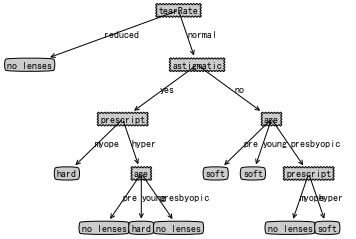

In [167]:
fr=open('lenses.txt')
lenses=[inst.strip().split('\t') for inst in fr.readlines()]
print(lenses)
lensesLabels=['age','prescript','astigmatic','tearRate']
lensesTree=createTree(lenses,lensesLabels)
print(lensesTree)
createPlot(lensesTree)

### 小结

本文中构造决策树的算法是基于信息增益的方式决定划分节点，也称之为ID3算法。ID3的缺点就是无法直接处理数值型数据，尽管可以通过量化的方法将数值型数据转化为标称型数据，但是如果存在太多的特征划分，ID3会面临其他的问题。    
数值型数据：可以在无限的数据中取，数值比较具体化（一般用于回归分析）  
标称型数据：一般是只存在‘是’和‘否’两种不同的结果（一般用于分类）  
  
    
决策树非常好的匹配了实验数据时，可能匹配的选项太多了，过渡匹配的问题可以通过裁剪决策树，合并相邻的无法产生大量信息增益的叶节点，消除此问题。  

ID3的其他问题是什么？
CART算法？
C4.5算法？


### 参考

《机器学习实战》 [美] Peter Harrington 著 李锐等译